# 1. Setup Project

## 1.1 Load virtualenv (wb_env)

In [26]:
### Run on terminal!

# cd /Users/vhpf/Library/CloudStorage/OneDrive-Personal/ProjetosCarreira/worldbank_stc_rainfall/
# source wb_env/bin/activate

# If you see (wb_env) (base), try conda deactivate


## 1.2 Set Working Directory and Skip Code

In [27]:
import os

desired_path = "/Users/vhpf/Library/CloudStorage/OneDrive-Personal/ProjetosCarreira/worldbank_stc_rainfall/WB_rainfall" # Change to the folder of your project
os.chdir(desired_path)
print("Current Working Directory:", os.getcwd()) # Check the current working directory

skip_code = True # Make it False to selected chucks (those with `if not skip_code:`)

Current Working Directory: /Users/vhpf/Library/CloudStorage/OneDrive-Personal/ProjetosCarreira/worldbank_stc_rainfall/WB_rainfall


## 1.3 Function to Download Packages

In [28]:
def download_library(library_name):
    try:
        __import__(library_name)
        print(f"{library_name} is already installed")
    except ImportError:
        print(f"{library_name} is not installed. Installing...")
        !pip install {library_name}
        print(f"{library_name} has been installed")

In [29]:
# Run this on the terminal for installing the gee API library
# pip install earthengine-api==0.1.238

In [30]:
# Run this on the terminal for installing the scikit-image library
# !pip install scikit-image

In [31]:
pip install h5netcdf

Note: you may need to restart the kernel to use updated packages.


## 1.4 Libraries to Install

In [32]:
new_libraries = [
    "numexpr", # For fast pd.query() manipulation
    "openpyxl", # For Excel manipulation
    "IPython.display", # For displaying HTML content
    "contextily", # For basemaps
    "rioxarray", # For raster data manipulation
    "rasterio.mask", # For raster data manipulation
    "rasterio.plot", # For raster data manipulation
    "pyogrio",  # For fast .gpkg file manipulation
    "pyarrow",  # For efficient data storage and manipulation
    "shapely.ops", # For unary_union
    "pyjanitor", # For data cleaning
    
    # Not in the previous scripts
    "cfgrib", # For GRIB file manipulation
    "xarray", # For multi-dimensional data manipulation
    "cdsapi", # For downloading data from the Copernicus Climate Data Store
    "cartopy", # For plotting maps
    "gc", # For garbage collection
    "logging", # For logging
    "concurrent.futures", # For parallel processing
    "netCDF4", # For netCDF file manipulation
    "h5netcdf" # For netCDF file manipulation
    "earthengine-api", # For Google Earth Engine
    "ee", # For Google Earth Engine
    "dask", # For parallel processing
    "eccodes", # For GRIB file manipulation
    "openpyxl", # For Excel manipulation
]

if skip_code:
    for lib in new_libraries:
        download_library(lib)

numexpr is already installed
openpyxl is already installed
IPython.display is already installed
contextily is already installed
rioxarray is already installed
rasterio.mask is already installed
rasterio.plot is already installed
pyogrio is already installed
pyarrow is already installed
shapely.ops is already installed
pyjanitor is not installed. Installing...
pyjanitor has been installed
cfgrib is already installed
xarray is already installed
cdsapi is already installed
cartopy is already installed
gc is already installed
logging is already installed
concurrent.futures is already installed
netCDF4 is already installed
h5netcdfearthengine-api is not installed. Installing...
ERROR: Could not find a version that satisfies the requirement h5netcdfearthengine-api (from versions: none)
ERROR: No matching distribution found for h5netcdfearthengine-api
h5netcdfearthengine-api has been installed
ee is already installed
dask is already installed
eccodes is already installed
openpyxl is already i

## 1.5 Load Libraries

In [46]:
### 1.5.1 At requirements.txt
#### Standard libraries
import importlib # For importing modules
import json # For working with JSON files
import math # For mathematical operations
import numpy as np # For numerical operations
import os # For managing paths and directories
import random # For generating random numbers
import requests # For making HTTP requests
import subprocess # For running shell commands
import time # For working with time
import warnings # For handling warnings

#### Data manipulation 
import fiona # For working with geospatial data
import folium # For creating interactive maps
import geopandas as gpd # For working with geospatial data
import matplotlib.pyplot as plt # For creating plots
import pandas as pd # For data manipulation
import rasterio 
import rasterio as rio # For working with raster data
from shapely.geometry import box, Point, Polygon, MultiPolygon, mapping, shape # For working with geometric objects

### 1.5.2 New libraries (make sure to run 1.3 and 1.4 before)
### Standard libraries
from calendar import monthrange # For getting the number of days in a month
import concurrent.futures # For parallel processing
from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor # For parallel processing
#import eccodes # For GRIB file manipulation
import io
from io import StringIO
from IPython.display import display, HTML # For displaying HTML content
import gc # For garbage collection
import h5netcdf # For netCDF file manipulation
import netCDF4 # For netCDF file manipulation
#import janitor # For data cleaning
import logging # For logging
from pathlib import Path

### Data manipulation
import cartopy.crs as ccrs # For plotting maps
import cdsapi # For downloading data from the Copernicus Climate Data Store
import cfgrib # For GRIB file manipulation
import contextily as ctx # For basemaps
import dask # For parallel processing
#import ee # For Google Earth Engine
import gc # For garbage collection
#import geowombat as gw # For raster downsampling rasters
import matplotlib.image as mpimg
import matplotlib.patches as patches # For making legend patches
import numexpr # For fast pd.query() manipulation
#import openpyxl # For Excel manipulation
import pyarrow  # For efficient data storage and manipulation
import pyogrio  # For fast .gpkg file manipulation
from rasterio.enums import Resampling
from rasterio.io import MemoryFile # For creating in-memory raster files
from rasterio.features import geometry_mask, shapes # For raster data manipulation
from rasterio.mask import mask # For raster data manipulation
from rasterio.merge import merge # For raster data manipulation
from rasterio.plot import show # For raster data manipulation
from rasterio.warp import calculate_default_transform, reproject, Resampling # For raster data manipulation
import rioxarray # For raster data manipulation
from shapely.ops import unary_union
import skimage # For image processing
from skimage.measure import block_reduce # For raster downsampling
from skimage.transform import rescale # To rescale images
import xarray as xr # For multi-dimensional data manipulation

## 1.6 Other Adjustments

In [34]:
pd.set_option('compute.use_numexpr', True) # Use numexpr for fast pd.query() manipulation

default_crs = 'EPSG:4326' # Default CRS for the project

## Function to display a scrollable dataframe  
def display_scrollable_dataframe(df): 
    # Convert DataFrame to HTML
    html = df.to_html()

    # Display as a scrollable table
    display(HTML(
        '<div style="height:400px;overflow:auto">' +
        html +
        '</div>'
    ))


## 1.7 Function to Plot Geometries Over an OSM

In [35]:
def plot_geometry_over_osm(polygon, center=None, zoom_start=12):    
    # Convert Shapely geometry to GeoJSON
    geojson = mapping(polygon)
    
    # If no center is provided, use the centroid of the polygon
    if center is None:
        # Extract centroid coordinates from polygon
        centroid = polygon.centroid
        center = (centroid.y, centroid.x)
    
    # Create a Folium map centered around the given location
    m = folium.Map(location=center, zoom_start=zoom_start, tiles='OpenStreetMap')
    
    # Add the GeoJSON data to the map
    folium.GeoJson(geojson).add_to(m)
    
    return m

## 1.8 Function to Plot a Raster

In [36]:
def plot_raster(raster, downsampling_factor):
    if not isinstance(raster, str):
        raise ValueError("Invalid input: raster must be a file path (str)")

    # Open the raster file
    src = rasterio.open(raster)

    # Read the data with downsampling by a factor
    data = src.read(
        out_shape=(
            src.count,
            int(src.height / downsampling_factor),
            int(src.width / downsampling_factor)
        ),
        resampling=rasterio.enums.Resampling.nearest
    )

    # Plotting the downsampled image
    plt.figure(figsize=(10, 10))
    img = plt.imshow(data[0], cmap='viridis')  # Change 'viridis' to any colormap you like
    plt.colorbar(img, label='Raster values')
    plt.show()

    # Close the raster file
    src.close()

## 1.9 Function to Close the Holes of a Polygon

In [37]:
def close_holes(poly: Polygon) -> Polygon:
    if poly.interiors:
        return Polygon(list(poly.exterior.coords))
    else:
        return poly
    
def close_holes_multipolygon(multipoly: MultiPolygon) -> MultiPolygon:
    return MultiPolygon([close_holes(poly) for poly in multipoly.geoms])

## 1.10 Function to Get the Largest Polygon From a MultiPolygon

In [38]:
def get_largest_polygon(multipolygon):
    # Convert the MultiPolygon into a GeoDataFrame
    gdf = gpd.GeoDataFrame(geometry=[poly for poly in multipolygon.geoms])

    # Calculate the area of each Polygon and add it as a new column
    gdf['area'] = gdf['geometry'].area

    # Get the row with the largest area
    largest_polygon_row = gdf.loc[gdf['area'].idxmax()]

    # Return the Polygon with the largest area
    return largest_polygon_row['geometry']

## 1.11 Function to Check if Path Exists, Create if Not and Save the GeoDataFrame

In [39]:
def save_gdf(gdf, file_path):
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)
    gdf.to_file(file_path)

# 2. Load Geometries

## 2.1 Grid

In [15]:
points_southamerica = gpd.read_file("output/data/grid/southamerica/basins2_points/file.shp", engine='pyogrio', use_arrow=True)
points_africa = gpd.read_file("output/data/grid/africa/basins2_points/file.shp", engine='pyogrio', use_arrow=True)
points_southeastasia = gpd.read_file("output/data/grid/southeastasia/basins2_points/file.shp", engine='pyogrio', use_arrow=True)
points_southasia = gpd.read_file("output/data/grid/southasia/basins2_points/file.shp", engine='pyogrio', use_arrow=True)

points = pd.concat([points_southamerica, points_africa, points_southeastasia, points_southasia], ignore_index=True)
points = points.to_crs(default_crs)
points

,id,PFAF_ID,region,longitude,latitude,geometry
0,61000001,61,South America,-71.612500,12.375000,POINT (-71.6125 12.375)
1,61000002,61,South America,-72.112500,12.125000,POINT (-72.1125 12.125)
2,61000003,61,South America,-71.862500,12.125000,POINT (-71.8625 12.125)
3,61000004,61,South America,-71.612500,12.125000,POINT (-71.6125 12.125)
4,61000005,61,South America,-71.362500,12.125000,POINT (-71.3625 12.125)
...,...,...,...,...,...,...
61877,45006074,45,South Asia,80.166667,6.168059,POINT (80.16667 6.16806)
61878,45006075,45,South Asia,80.416667,6.168059,POINT (80.41667 6.16806)
61879,45006076,45,South Asia,80.666667,6.168059,POINT (80.66667 6.16806)
61880,45006077,45,South Asia,80.916667,6.168059,POINT (80.91667 6.16806)


## 2.2 Grid Bounds

In [16]:
southamerica_grid_N = points_southamerica.bounds.maxy.max() # Get the maximum latitude of the bounding box (northernmost point)
southamerica_grid_S = points_southamerica.bounds.miny.min() # Get the minimum latitude of the bounding box (southernmost point)
southamerica_grid_E = points_southamerica.bounds.maxx.max() # Get the maximum longitude of the bounding box (easternmost point)
southamerica_grid_W = points_southamerica.bounds.minx.min() # Get the minimum longitude of the bounding box (westernmost point)
 
africa_grid_N = points_africa.bounds.maxy.max()
africa_grid_S = points_africa.bounds.miny.min()
africa_grid_E = points_africa.bounds.maxx.max()
africa_grid_W = points_africa.bounds.minx.min()

southeastasia_grid_N = points_southeastasia.bounds.maxy.max()
southeastasia_grid_S = points_southeastasia.bounds.miny.min()
southeastasia_grid_E = points_southeastasia.bounds.maxx.max()
southeastasia_grid_W = points_southeastasia.bounds.minx.min()

southasia_grid_N = points_southasia.bounds.maxy.max()
southasia_grid_S = points_southasia.bounds.miny.min()
southasia_grid_E = points_southasia.bounds.maxx.max()
southasia_grid_W = points_southasia.bounds.minx.min()

## 2.3 Continents

In [17]:
continents = gpd.read_file("output/data/continents/file.shp", engine='pyogrio', use_arrow=True)

southamerica_geom = continents.query("region == 'South America'").geometry.values[0]
africa_geom = continents.query("region == 'Africa'").geometry.values[0]
southeastasia_geom = continents.query("region == 'Southeast Asia'").geometry.values[0]
southasia_geom = continents.query("region == 'South Asia'").geometry.values[0]

southamerica_gdf = gpd.GeoDataFrame(geometry=[southamerica_geom], crs=default_crs)
africa_gdf = gpd.GeoDataFrame(geometry=[africa_geom], crs=default_crs)
southeastasia_gdf = gpd.GeoDataFrame(geometry=[southeastasia_geom], crs=default_crs)
southasia_gdf = gpd.GeoDataFrame(geometry=[southasia_geom], crs=default_crs)


IndexError: index 0 is out of bounds for axis 0 with size 0

# 3. ERA5 API
ERA5 API Keys<br>
<br>
url: https://cds-beta.climate.copernicus.eu/api<br>
key: 4466a85f-0b2d-480f-8055-ebfe187fc5ba


Quick explanation: netCDFs are 3d rasters. Tiff files have 2 dimension (long and lat) while netCDFs accepts another dimension (time, in this case)

Setting up CDS API is not straightforward. Some foruns may halp you:<br>
- [Python API Step by Step](https://forum.ecmwf.int/t/step-by-step-instructions-on-how-to-download-data-using-new-climate-data-store-beta-cds-beta/3743/9)
- [Migrate to the New CDS](https://forum.ecmwf.int/t/informative-page-in-readiness-for-new-cds-beta/2985)
- [Detailed Resources on the How to Migrate to the New CDS](https://confluence.ecmwf.int/display/CKB/Please+read%3A+CDS+and+ADS+migrating+to+new+infrastructure%3A+Common+Data+Store+%28CDS%29+Engine)
- [Common] Error Messages](https://confluence.ecmwf.int/display/CKB/Common+Error+Messages+for+CDS+Requests)
- [Datasets and See Customized Requests](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels-monthly-means?tab=form): check section 'download data' > set your params > 'Show API request' to see how to properly enter the params on your Python code.

## 3.1 One Example: South America Monthly Precipitation Mean in Jan 2000

In [18]:
# Make sure to have an existing output/data/era5_precipitation/ folder

c = cdsapi.Client()

dataset = 'reanalysis-era5-single-levels-monthly-means' # Dataset to get data from
parameters = {
    'format': 'netcdf',
    'variable': 'total_precipitation',
    'year': '2000',
    'month': '01',
    'area': [southamerica_grid_N, southamerica_grid_W, southamerica_grid_S, southamerica_grid_E],
    'product_type': 'monthly_averaged_reanalysis',
    'time': '00:00',
    'dataset_short_name': 'reanalysis-era5-single-levels-monthly-means',
    'target': 'output/data/era5_precipitation/southamerica_01_2000.nc'
}

output_file = 'output/data/era5_precipitation/southamerica_01_2000.nc' # Name and place of the output file
os.makedirs(os.path.dirname(output_file), exist_ok=True) # Create the output directory if it doesn't exist 

c.retrieve(name=dataset, request=parameters, target=output_file)

2024-10-10 17:33:18,618 WARNING [2024-10-10T00:00:00] The final validated ERA5 differs from ERA5T in July 2024 - please refer to our
[Forum announcement](https://forum.ecmwf.int/t/final-validated-era5-product-to-differ-from-era5t-in-july-2024/6685)
for details and watch it for further updates on this.
2024-10-10 17:33:18,619 WARNING [2024-10-10T20:33:18.515864] You are using a deprecated API endpoint. If you are using cdsapi, please upgrade to the latest version.
2024-10-10 17:33:18,620 INFO Request ID is 89e92dd6-d357-4a0d-b55b-008e79715e06
2024-10-10 17:33:18,984 INFO status has been updated to accepted
2024-10-10 17:33:20,829 INFO status has been updated to running
2024-10-10 17:33:27,121 INFO status has been updated to successful


f13506424d408fd6265bb20c37c55124.nc:   0%|          | 0.00/91.6k [00:00<?, ?B/s]

'output/data/era5_precipitation/southamerica_01_2000.nc'

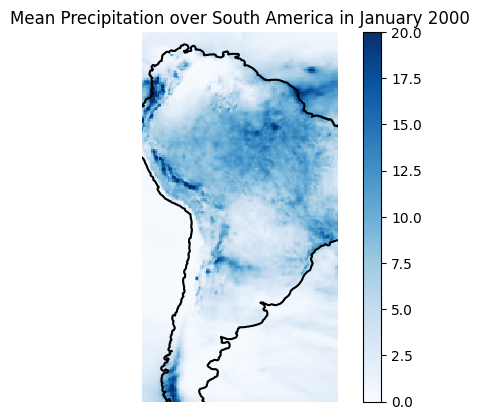

In [70]:
# Open the NetCDF file
ds = xr.open_dataset('output/data/era5_precipitation/southamerica_01_2000.nc')

# Get the minimum and maximum longitude and latitude from the dataset
lon_min, lon_max = ds.longitude.min(), ds.longitude.max()
lat_min, lat_max = ds.latitude.min(), ds.latitude.max()

# Create a figure and axes
fig, ax = plt.subplots()

# Set the x and y limits of the plot to the min and max longitude and latitude
ax.set_xlim([lon_min, lon_max])
ax.set_ylim([lat_min, lat_max])

img = precip_mm.plot(ax=ax, vmin=0, vmax=20, cmap='Blues', add_colorbar=False) # vmax is now 20 (0.020 m = 20 mm)
cbar = plt.colorbar(img, ax=ax) # Add a colorbar
gpd.GeoSeries([southamerica_geom]).boundary.plot(ax=ax, color='black') # Plot the South America boundary
plt.title('Mean Precipitation over South America in January 2000') # Add a title
ax.axis('off') # Turn off the axis

plt.show()

## 3.2 Download Precipitation 

In [20]:
## Function to save precipitation means for a region and a month/year
def save_era5_precipitation(region, month, year):
    # It queries variables from monthly_averaged_reanalysis dataset
    
    region_name = region.lower().replace(' ', '') # Get the region path
        
    geom = points.query(f"region == '{region}'") # Get the geometry of the region
    
    # Area to query (adding 10 degrees to each side as margin)
    geom_n = geom.bounds.maxy.max()
    geom_n = geom_n + 10
    geom_s = geom.bounds.miny.min()
    geom_s = geom_s - 10
    geom_e = geom.bounds.maxx.max()
    geom_e = geom_e + 10
    geom_w = geom.bounds.minx.min()
    geom_w = geom_w - 10
    
    # Make sure that month is a string with two digits and year is string
    month = int(month)
    month = str(month).zfill(2)
    year = str(year)
    
    # Initialize the CDS API client
    c = cdsapi.Client()
    
    # Create the output path and set the output file
    output_path = f"output/data/era5_precipitation/{region_name}"
    os.makedirs(output_path, exist_ok=True)
    output_file = f"{output_path}/{year}_{month}.nc"
    
    parameters = {
    'format': 'netcdf',
    'variable': 'total_precipitation',
    'year': year,
    'month': month,
    'area': [geom_n, geom_w, geom_s, geom_e],
    'product_type': 'monthly_averaged_reanalysis',
    'time': '00:00',
    'dataset_short_name': 'reanalysis-era5-single-levels-monthly-means',
    'target': output_file
    }
    
    # Request the data
    c.retrieve('reanalysis-era5-single-levels-monthly-means', parameters, parameters['target'])
    
    # Delete parameters, geom and c to free up memory
    del parameters
    del geom
    del c
    
    print(f"Saved for {year}-{month} in {region}.")
    gc.collect()

In [32]:
if skip_code:
    teste1 = save_era5_precipitation('South Asia', 3, 2000) # Test for one region and month/year

2024-09-13 10:32:49,157 INFO Request ID is 8222ce4d-e297-43cd-a3de-8ca12ca0a505
2024-09-13 10:32:49,405 INFO status has been updated to accepted
2024-09-13 10:32:51,163 INFO status has been updated to running
2024-09-13 10:32:57,394 INFO Creating download object as as_source with files:
['data_0.nc']
2024-09-13 10:33:10,665 INFO status has been updated to successful


20ea7e1393ece1881510caf67656ecce.nc:   0%|          | 0.00/92.4k [00:00<?, ?B/s]

Saved for 2000-03 in South Asia.


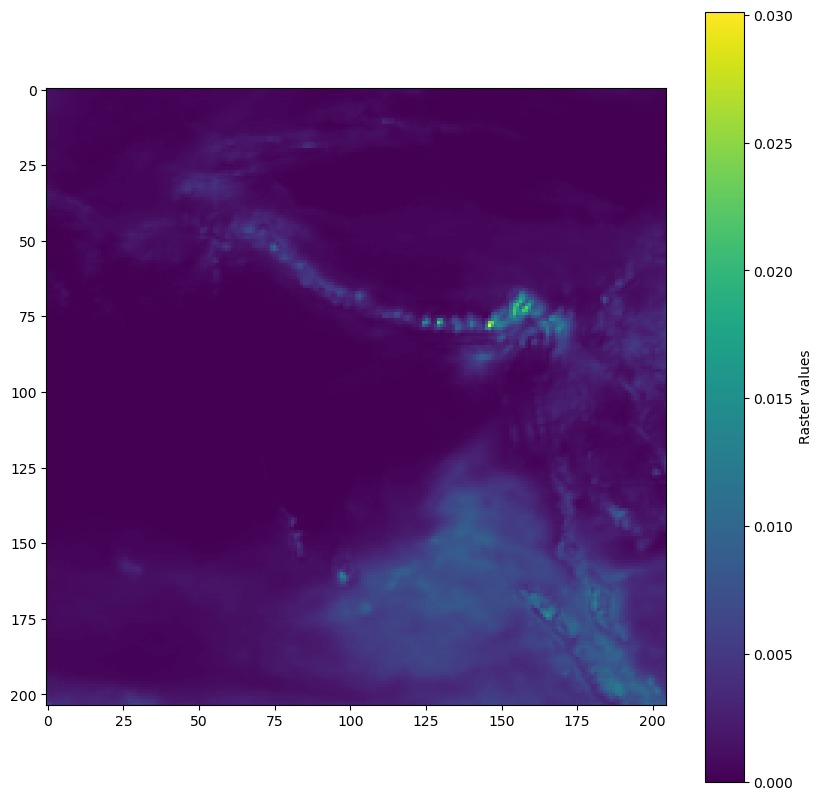

In [33]:
teste_path = '/Users/vhpf/Library/CloudStorage/OneDrive-Personal/ProjetosCarreira/worldbank_stc_rainfall/wb_rainfall2/output/data/era5_precipitation/southasia/2000_03.nc'
plot_raster(teste_path,1)

In [21]:
## Setup request parameters
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
years = range(2000, 2021) # From 2000 to 2020

In [22]:
## Set up the parallel processing for precipitation
def save_era5_precipitation_date(args):
    region, month, year = args
    print(f"Processing {year}-{month} in {region}...")
    save_era5_precipitation(region, month, year)
    gc.collect()  # Clean memory
    print("Saved")
    print('------------------')

def process_dates(years, months, region):
    with concurrent.futures.ThreadPoolExecutor(max_workers=8) as executor:  # Adjust max_workers based on your CPU cores
        tasks = [(region, month, year) for year in years for month in months]
        futures = [executor.submit(save_era5_precipitation_date, task) for task in tasks]
        
        for future in concurrent.futures.as_completed(futures):
            try:
                future.result()
            except Exception as e:
                print(f"Error in future: {e}")
            finally:
                gc.collect()  # Clean memory

    print("All dates processed.")

In [ ]:
warnings.filterwarnings('ignore') # Ignore warnings

if skip_code: # Turn this into "if not skip_code:" to jump this cell
    process_dates(years = years, months = months, region = 'South America')

In [ ]:
if skip_code:
    process_dates(years = years, months = months, region = 'Africa')

In [ ]:
if skip_code:
    process_dates(years = years, months = months, region = 'Southeast Asia')

In [ ]:
if skip_code:
    process_dates(years = years, months = months, region = 'South Asia')
    
warnings.filterwarnings('default') # Reset the warnings to default

## 3.3 Check for Missing Precipitation Files

In [24]:
def check_missing_files(region, start_year=1992, end_year=2021):
    # Get region lowercase name
    region_name = region.lower().replace(' ', '') # Get the region path
    
    directory = f'output/data/era5_precipitation/{region_name}'

    expected_files = [f"{year}_{str(month).zfill(2)}.nc" for year in range(start_year, end_year+1) for month in range(1, 13)] # Generate the expected file names
    actual_files = os.listdir(directory) # Get the actual files in the directory
    missing_files = set(expected_files) - set(actual_files) # Find the missing files

    for file in missing_files: # Check if there is some missing month in the expected files
        print(f"Missing file: {file}")
        
        missing_year = file.split('_')[0]
        missing_year = int(missing_year)
        missing_year = list(range(missing_year, missing_year + 1)) # Get the missing year of each file

        missing_month = file.split('_')[1].split('.')[0]
        missing_month = int(missing_month)
        missing_month = list(range(missing_month, missing_month + 1)) # Get the missing month of each file
        
        process_dates(years = missing_year, months = missing_month, region = region) # Process the missing files and save them

In [ ]:
check_missing_files('South America', start_year=1992, end_year=2020) # No more missing files

In [ ]:
check_missing_files('Africa', start_year=1992, end_year=2020) # No more missing files

In [ ]:
check_missing_files('Southeast Asia', start_year=1992, end_year=2020) # No more missing files

In [25]:
check_missing_files('South Asia', start_year=2000, end_year=2020) # No more missing files

## 3.4 Turn Precipitation netCDF Files into .tif

In [64]:
def netcdf_to_tif(year: int, month: int, region_name: str):
    """
    Converts the precipitation NetCDF files to a GeoTIFF files.
    """
    
    ## netCDF path:
    year = str(year)
    month = str(month).zfill(2)
    days_in_month = monthrange(int(year), int(month))[1]
    
    netcdf_path = f"output/data/era5_precipitation/{region_name}/{year}_{month}.nc"
    
    # Open the NetCDF file using xarray
    dataset = xr.open_dataset(netcdf_path)

    # Select the data variable and set CRS (Coordinate Reference System)
    data_var = dataset['tp'] * 1000 * days_in_month
    data_var = data_var.rio.write_crs("EPSG:4326")  # WGS84 CRS (assuming lat/lon)

    # Export to GeoTIFF
    output_path = f"output/data/era5_precipitation_rasters/{region_name}"
    os.makedirs(output_path, exist_ok=True)
    output_file = f"{output_path}/{year}_{month}.tif"

    data_var.rio.to_raster(output_file)

    print(f"Raster saved for {year}-{month} in {region_name}.")
    return


In [58]:
test = netcdf_to_tif(2001, 2, 'southamerica') # Test for one region and month/year
test

'Raster saved for 2001-02 in southamerica.'

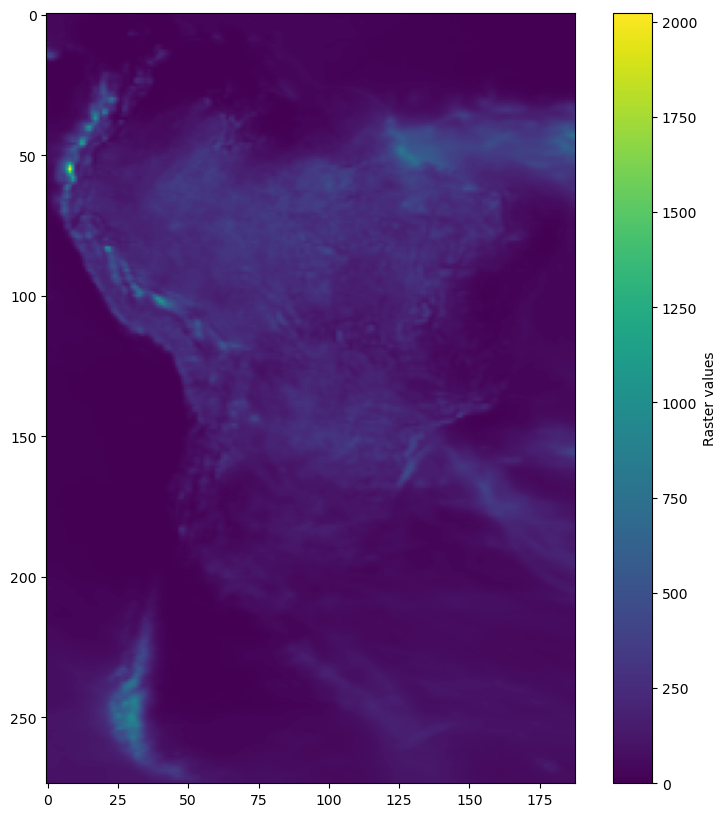

In [61]:
test_path = '/Users/vhpf/Library/CloudStorage/OneDrive-Personal/ProjetosCarreira/worldbank_stc_rainfall/WB_rainfall/output/data/era5_precipitation_rasters/southamerica/2001_02.tif'
plot_raster(test_path,1)

In [65]:
## Run for all regions and months
if skip_code:
    for year in range(2000,2021):
        for month in range(1,13):
            netcdf_to_tif(year, month, 'southamerica')
            netcdf_to_tif(year, month, 'africa')
            netcdf_to_tif(year, month, 'southeastasia')

Raster saved for 2000-01 in southamerica.
Raster saved for 2000-01 in africa.
Raster saved for 2000-01 in southeastasia.
Raster saved for 2000-02 in southamerica.
Raster saved for 2000-02 in africa.
Raster saved for 2000-02 in southeastasia.
Raster saved for 2000-03 in southamerica.
Raster saved for 2000-03 in africa.
Raster saved for 2000-03 in southeastasia.
Raster saved for 2000-04 in southamerica.
Raster saved for 2000-04 in africa.
Raster saved for 2000-04 in southeastasia.
Raster saved for 2000-05 in southamerica.
Raster saved for 2000-05 in africa.
Raster saved for 2000-05 in southeastasia.
Raster saved for 2000-06 in southamerica.
Raster saved for 2000-06 in africa.
Raster saved for 2000-06 in southeastasia.
Raster saved for 2000-07 in southamerica.
Raster saved for 2000-07 in africa.
Raster saved for 2000-07 in southeastasia.
Raster saved for 2000-08 in southamerica.
Raster saved for 2000-08 in africa.
Raster saved for 2000-08 in southeastasia.
Raster saved for 2000-09 in sout

FileNotFoundError: [Errno 2] No such file or directory: '/Users/vhpf/Library/CloudStorage/OneDrive-Personal/ProjetosCarreira/worldbank_stc_rainfall/WB_rainfall/output/data/era5_precipitation/southamerica/2021_01.nc'

## 3.4 Download Wind

In [26]:
## Function to save wind direction and speed for a region and a month/year
def save_era5_wind(region, month, year):
    # It queries variables from monthly_averaged_reanalysis dataset
    
    # Get geom from continents gdf
    geom = points.query(f"region == '{region}'")
    
    region_name = region.lower().replace(' ', '') # Get the region path
    
    # Area to query (adding 10 degrees to each side as margin)
    geom_n = geom.bounds.maxy.max()
    geom_n = geom_n + 10
    geom_s = geom.bounds.miny.min()
    geom_s = geom_s - 10
    geom_e = geom.bounds.maxx.max()
    geom_e = geom_e + 10
    geom_w = geom.bounds.minx.min()
    geom_w = geom_w - 10
    
    # Make sure that month is a string with two digits and year is string
    month = int(month)
    month = str(month).zfill(2)
    year = str(year)
    
    # Initialize the CDS API client
    c = cdsapi.Client()
    
    # Variables to query
    wind_variables = ["u_component_of_wind", "v_component_of_wind", "vertical_velocity"]
    pressure_levels_50 = [str(i) for i in np.arange(250, 751, 50)] # 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750 hPa
    pressure_levels_25 = [str(i) for i in np.arange(775, 1001, 25)] # 775, 800, 825, 850, 875, 900, 925, 950, 975, 1000 hPa
    presure_levels = pressure_levels_50 + pressure_levels_25
    
    # Create the output path and set the output file
    output_path = f"output/data/era5_wind/{region_name}"
    os.makedirs(output_path, exist_ok=True)
    output_file = f"{output_path}/{year}_{month}.nc"
    
    # Parameters for the request
        # Parameters for the request
    parameters = {
    'format': 'netcdf',
    'variable': wind_variables,
    'pressure_level': presure_levels,
    'year': year,
    'month': month,
    'area': [geom_n, geom_w, geom_s, geom_e],
    'product_type': 'monthly_averaged_reanalysis',
    'time': '00:00',
    'dataset_short_name': 'reanalysis-era5-pressure-levels-monthly-means',
    'target': output_file
    }
    
    # Request the data
    c.retrieve('reanalysis-era5-pressure-levels-monthly-means', parameters, parameters['target'])
    
    # Delete parameters to free up memory
    del parameters
    del geom
    del c
    
    print(f"Saved for {year}-{month} in {region}.")
    gc.collect()


In [35]:
if skip_code:
    teste1 = save_era5_wind('South Asia', 3, 2000)

2024-09-13 10:33:54,085 INFO Request ID is 6079b61d-5320-4169-99ba-b605a2eb2ec7
2024-09-13 10:33:54,365 INFO status has been updated to accepted
2024-09-13 10:33:56,124 INFO status has been updated to running
2024-09-13 10:34:27,190 INFO Creating download object as as_source with files:
['data_0.nc']
2024-09-13 10:34:27,191 INFO status has been updated to successful


415081dc2f0a1cb1ae14b78c82b085bf.nc:   0%|          | 0.00/6.15M [00:00<?, ?B/s]

Saved for 2000-03 in South Asia.


In [27]:
save_era5_wind('Southeast Asia', 11, 2012)

2024-09-03 15:34:53,798 INFO Request ID is 8751d833-5bb4-4dd5-bcef-bd983345dad1
2024-09-03 15:34:54,071 INFO status has been updated to accepted
2024-09-03 15:39:14,685 INFO Creating download object as as_source with files:
['data_0.nc']
2024-09-03 15:39:14,698 INFO status has been updated to successful


1374245f5478c3abbd8982597b7c8937.nc:   0%|          | 0.00/6.25M [00:00<?, ?B/s]

Saved for 2012-11 in Southeast Asia.


In [21]:
## Setup request parameters
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
years = range(2000, 2024) # From 1992 to 2020

In [27]:
## Set up the parallel processing for wind
def save_era5_wind_date(args):
    region, month, year = args
    print(f"Processing {year}-{month} in {region}...")
    save_era5_wind(region, month, year)
    gc.collect()  # Clean memory
    print("Saved")
    print('------------------')
    
def process_dates(years, months, region):
    with concurrent.futures.ThreadPoolExecutor() as executor:  # Adjust max_workers based on your CPU cores
        tasks = [(region, month, year) for year in years for month in months]
        futures = [executor.submit(save_era5_wind_date, task) for task in tasks]
        
        for future in concurrent.futures.as_completed(futures):
            try:
                future.result()
            except Exception as e:
                print(f"Error in future: {e}")
            finally:
                gc.collect()  # Clean memory

    print("All dates processed.")

In [ ]:
warnings.filterwarnings('ignore') # Ignore warnings

if skip_code: # Turn this into "if not skip_code:" to jump this cell
    process_dates(years = years, months = months, region = 'South America')

In [ ]:
if skip_code:
    process_dates(years = years, months = months, region = 'Africa')

In [ ]:
if skip_code:
    process_dates(years = years, months = months, region = 'Southeast Asia')

In [ ]:
if skip_code:
    process_dates(years = years, months = months, region = 'South Asia')
    
warnings.filterwarnings('default') # Ignore warnings

## 3.5 Check for Missing Wind Files


In [28]:
def check_missing_files(region, start_year=1992, end_year=2021):
    region_name = region.lower().replace(' ', '') # Get the region path
    
    directory = f'output/data/era5_wind/{region_name}'

    expected_files = [f"{year}_{str(month).zfill(2)}.nc" for year in range(start_year, end_year+1) for month in range(1, 13)] # Generate the expected file names
    actual_files = os.listdir(directory) # Get the actual files in the directory
    missing_files = set(expected_files) - set(actual_files) # Find the missing files

    for file in missing_files:
        print(f"Missing file: {file}")
        
        missing_year = file.split('_')[0]
        missing_year = int(missing_year)
        missing_year = list(range(missing_year, missing_year + 1)) # Get the missing year of each file

        missing_month = file.split('_')[1].split('.')[0]
        missing_month = int(missing_month)
        missing_month = list(range(missing_month, missing_month + 1)) # Get the missing month of each file
        
        process_dates(years = missing_year, months = missing_month, region = region) # Process the missing files and save them

In [ ]:
check_missing_files('Africa', start_year=1992, end_year=2020) # No more missing files

In [ ]:
check_missing_files('South America', start_year=1992, end_year=2020) # No more missing files

In [ ]:
check_missing_files('Southeast Asia', start_year=1992, end_year=2020) # No more missing files

In [29]:
check_missing_files('South Asia', start_year=2000, end_year=2020) # No more missing files

In [ ]:
## Plot it

# Open the NetCDF file
ds = xr.open_dataset('output/data/era5_wind/southamerica_01_2000.nc')

# Create a figure and axes
fig, ax = plt.subplots()
img = precip_mm.plot(ax=ax, vmin=0, vmax=20, cmap='Blues', add_colorbar=False) # vmax is now 20 (0.020 m = 20 mm)
cbar = plt.colorbar(img, ax=ax) # Add a colorbar
points_southamerica.plot(ax=ax, color='red', alpha = 0.05) # Plot the points
gpd.GeoSeries([southamerica_geom]).boundary.plot(ax=ax, color='black') # Plot the South America boundary
plt.title('Mean Precipitation over South America in January 2000') # Add a title
ax.axis('off') # Turn off the axis

plt.show()